# Particle Swarm Optimization with Python

The particle swarm optimization (PSO) algorithm is a population-based search algorithm based on the simulation of the social behavior of animals moving in large groups (particularly birds). 
The PSO algorithm has been widely studied algorithm over the years due to its competitive results in different applications. Main goal of the algorithm is to explore the search space of interest using groups made of particles. A group of particles makes swarm, which is identified with a population in evolutionary terms. Each particle is characterized by its current position $x$ which represents a potential solution of the
optimization problem and its current velocity $v$.
Velocity is the difference between the current and previous positions. The initial position of each particle is
randomly set within the search space, while the initial velocities are randomly chosen from the prescribed interval
of allowable values. Particles compute their criterion values at each iteration, and use this information to update their
position within the search space. Each particle remembers its best personal position in the history of the search that can
be denoted by $p_{best}$, while swarm remembers the best global position within the swarm, denoted by $g_{best}$. In particle
swarm optimization (PSO), a particle’s movement is guided by two solutions, the swarm’s global best  and the particle’s
personal best. The basic idea of the PSO algorithm is that particles are moving guided by the personal and global best
positions through the search space. PSO calculates a new value of velocity in every iteration. A new position of each
particle is updated by the following equation:

\begin{align}
v[k+1]&=w \cdot v[k]+cp \cdot rp[k] (p_{best}[k]-x[k])+cg \cdot rg[k](g_{best}[k]-x[k])\\
x[k+1]&=x[k]+v[k+1]
\end{align}

The parameters $w$, $cp$ and $cg$ represent inertial, cognitive
and social component, while $rp$ and $rg$ are independent,
uniformly distributed random numbers in the range $[0, 1]$.
Their values are changed in order to improve performance
which led to different modifications of the PSO algorithm. 

In the particle velocity equation, two important groups can be noticed:

* social term: $cg \cdot rg[k](g_{best}[k]-x[k])$
* cognitive term: $cp \cdot rp[k] (p_{best}[k]-x[k])$

The PSO algorithm consists of the next steps:

1. Initialize: Set parameters of algorithm like number of iterations,  number of particles, randomly initialize particle positions, randomly initialize particle velocities, etc.
2. Optimize - iteration steps:
    * Evaluate the fitness of each particle i.e. calculate cost function $f^i[k]$ for each particle $x^i[k]$
    * Update individual and global best fitnesses and positions:
    
      if $f^i[k]\leq f^i_{p_{best}}$ then $f^i_{p_{best}}=f^i[k]$ and $p^i_{best}[k]=x^i[k]$
      
       if $f^i[k]\leq f_{g_{best}}$ then $f_{g_{best}}=f^i[k]$ and $g_{best}[k]=x^i[k]$
    
    * Update velocity and position of each particle
    
3.  Check for the stopping criteria   
    


The implementation of a PSO algorithm in python using object-oriented approach is presented below:

In [1]:
# Load basic numeric packages
import numpy as np
import random as random
import math as math

In [2]:
#This class defines default values of the options within the options structure.
class myOptions:
    def __init__(self):
        self.npart          = 30;       # The number of particles.
        self.niter          = 100;      # The number of iterations.
        self.cbi            = 2.5;      # Initial value of the individual-best acceleration factor.
        self.cbf            = 0.5;      # Final value of the individual-best acceleration factor.
        self.cgi            = 0.5;      # Initial value of the global-best acceleration factor.
        self.cgf            = 2.5;      # Final value of the global-best acceleration factor.
        self.wi             = 0.9;      # Initial value of the inertia factor.
        self.wf             = 0.4;      # Final value of the inertia factor.
        self.vmax           = math.inf;      # Absolute speed limit. It is the primary speed limit.
        self.vmaxscale      = float('nan');      #Relative speed limit. Used only if absolute limit is unspecified.
        self.vspaninit      = 1;        # The initial velocity span. Initial velocities are initialized 
        self.initpopulation = float('nan'); 
        self.initoffset     = 0;        # Offset of the initial population.
        self.initspan       = 1;        # Span of the initial population.
        self.trustoffset    = 0;        # If set to 1 (true) and offset is vector, than the offset is 
                                # believed to be a good solution candidate, so it is included in 
                                # the initial swarm.
 


In [3]:
class Error(Exception):
    def __init__(self, message):
        self.message = message

In [4]:
class Particle:
    def __init__(self,x0,num_dimensions,options):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.fitness_best_i=-1          # best fitness individual
        self.fitness_i=-1               # fitness individual
        self.num_dimensions=num_dimensions  

        # Initial positions and velocities
        for i in range(0,num_dimensions):
            self.velocity_i.append((np.random.rand()-0.5)*2*options.vspaninit)            
            self.position_i.append(x0[i][0])

    # calculate current fitness and calculating new individually best values
    def evaluate(self,costFunc):
        self.fitness_i=costFunc(self.position_i)
        # upadete individual best -> check to see if the current position is better than an individual best
        if self.fitness_i < self.fitness_best_i or self.fitness_best_i==-1:
            self.pos_best_i=self.position_i
            self.fitness_best_i=self.fitness_i

            
    def linrate(self,xmax, xmin, tmax, tmin, t):
        x = xmin + ((xmax-xmin)/(tmax-tmin))*(tmax-t)
        return x
    
    # update new particle velocity
    def update_velocity(self,pos_best_g,maxiter,iter,opt):
               
        # Calculating PSO parameters
        w = self.linrate(opt.wf, opt.wi, maxiter, 0, iter);
        cp = self.linrate(opt.cbf, opt.cbi, maxiter, 0, iter);
        cg = self.linrate(opt.cgf, opt.cgi, maxiter, 0, iter);


        for i in range(0,self.num_dimensions):
            r1=random.random()
            r2=random.random()
            # Calculating speeds
            vel_cognitive=cp*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=cg*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates->moving particle
    def update_position(self):
        for i in range(0,self.num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
         #   if self.position_i[i]>bounds[i][1]:
          #      self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
         #   if self.position_i[i] < bounds[i][0]:
         #       self.position_i[i]=bounds[i][0]
                
                
                
          
                

In [5]:
class PSO():
    def __init__(self,costFunc,num_dimensions,options):
        
        fitness_best_g=-1                   # best fitness in population
        pos_best_g=[]                      # best position in population

        maxiter=options.niter
        num_particles=options.npart
        population=[]
        if ((~np.isnan(options.initpopulation)).all()):
            b=np.shape(options.initpopulation)   
            if(np.size(b)==1):
                pno=b[0]
                pdim=1
            if (pno!=options.npart) or (pdim!=options.nvar):
                 raise Error("The format of initial population is inconsistent with desired population")
            population=options.initpopulation;
        else:            
            for i in range(0,num_particles):
                x0= (np.random.rand(num_dimensions,1)-0.5)*2*options.initspan + options.initoffset
                population.append(Particle(x0,num_dimensions,options))

        #################################
        ###The main loop  ###############
        #################################
        # Begin optimization loop
        i=0
        while i < maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                population[j].evaluate(costFunc)

                # Calculating new globally best values (globally)
                if population[j].fitness_i < fitness_best_g or fitness_best_g == -1:
                    pos_best_g=list(population[j].position_i)
                    fitness_best_g=float(population[j].fitness_i)

            # Population is moving-> cycle through population and update velocities and position
            for j in range(0,num_particles):
                population[j].update_velocity(pos_best_g,maxiter,i,options)
                population[j].update_position()
            i+=1

        # print final results
        print( 'Optimal point:')
        print( pos_best_g)
        print( 'Optimal value:')
        print (fitness_best_g)

## Testing of PSO algorithm

To test the effectiveness of proposed PSO algorithm standard test function is used (Ackley,Griewank, etc).

### Ackley function
The Ackley function is widely used for testing optimization algorithms described by:
\begin{equation}
f(x)=-a \exp{(-b\sqrt{\frac{1}{d}\sum_{i=1}^d{x^2_i}})}-\exp{(\frac{1}{d}\sum_{i=1}^d\cos{(c x_i)})}+a+\exp(1)
\end{equation}

Dimensions: d 

Recommended variable values are: $a = 20$, $b = 0.2$ and $c = 2\pi$. 

Global Minimum: $f(0, \cdots, 0) = 0$

In [6]:
#--- COST FUNCTION ------------------------------------------------------------+

# Test Functions-Ackley function
def ackley(x):
    sum1=0
    sum2=0
    a=20
    b=0.2
    c=2*math.pi
    d=len(x)
    for i in range(len(x)):
        sum1+=x[i]**2
        sum2+=math.cos(c*x[i])
    total= -a*math.exp(-b*math.sqrt(sum1/d))-math.exp(sum2/d)+a+math.exp(1)
    return total



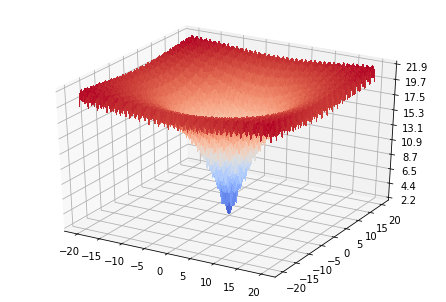

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plotN = 100
x1 = np.linspace(-20, 20, plotN)
x2 = np.linspace(-20, 20, plotN)
x1, x2 = np.meshgrid(x1,x2)
z=np.zeros(x1.shape)
fig = plt.figure()
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        z[i][j]=ackley([x1[i][j] ,x2[i][j]])
ax = Axes3D(fig)
surf =ax.plot_surface(x1,x2,z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

#ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.01f'))

fig.savefig('ackley.jpg', format='jpg', dpi=1200)
plt.show()



Running of the PSO algorithm to find the global minimum of 5-dimensional Ackley function:

In [8]:
options1 = myOptions()
options1.npart=150
options1.niter=300

a=PSO(ackley,5,options=options1)

Optimal point:
[6.662048692889227e-16, 8.652886830120277e-16, 4.61168893018113e-16, -1.613393370623183e-15, -2.2526706812956775e-17]
Optimal value:
3.9968028886505635e-15


### Griewank function
The Griewank function has many widespread local minima, which are regularly distributed. The complexity is shown in the zoomed-in plots. 
\begin{equation}
f(x) = 1 + \frac{1}{4000} \sum_{i=1}^d x^2_i - \prod_{i=1}^d cos(\frac{x_i}{\sqrt{i}})
\end{equation}

Global Minimum:
$f(0, \cdots, 0) = 0$

Dimensions: d 

In [ ]:
# Test Functions-Griewank  function
def griewank(x):
    sum1=0
    pro2=1
  
    d=len(x)
    for i in range(len(x)):
        sum1+=x[i]**2
        pro2*=math.cos(x[i]/math.sqrt(i+1))
    total= sum1-pro2+1
    return total

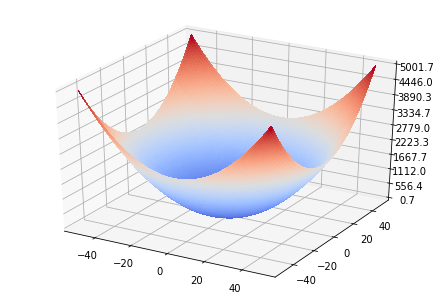

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plotN = 100
x1 = np.linspace(-50, 50, plotN)
x2 = np.linspace(-50, 50, plotN)
x1, x2 = np.meshgrid(x1,x2)
z=np.zeros(x1.shape)
fig = plt.figure()
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        z[i][j]=griewank([x1[i][j] ,x2[i][j]])
ax = Axes3D(fig)
surf =ax.plot_surface(x1,x2,z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

#ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.01f'))


plt.show()
fig.savefig('griewank.jpg', format='jpg', dpi=1200)
   
    


Running of the PSO algorithm to find the global minimum of 5-dimensional Griewank function:

In [ ]:
options1 = myOptions()
options1.npart=150
options1.niter=300

a=PSO(griewank,5,options=options1)

Optimal point:
[4.19367721647306e-09, 4.266456371813963e-09, 1.9900401228527e-09, -5.386009976093309e-09, 2.2487475347130643e-09, 6.3025268542288426e-09, -1.3082165148596177e-09, 3.5846336989876374e-09, 1.22605890057102e-09, -1.248611355165706e-09, 1.0212979395691002e-09, 2.1510299363390408e-09, -1.2835634797592394e-09, 1.5743222155509944e-09, -5.32909511577856e-11]
Optimal value:
1.1102230246251565e-16
